C:\Users\alam.92\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\alam.92\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\alam.92\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\alam.92\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis depreca

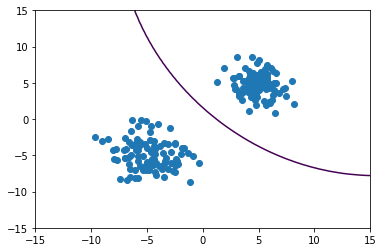

In [25]:
import numpy as np
import pylab as pl
from sklearn import mixture

np.random.seed(0)
C1 = np.array([[3, -2.7], [1.5, 2.7]])
C2 = np.array([[1, 2.0], [-1.5, 1.7]])

X_train = np.r_[
    np.random.multivariate_normal((-5, -5), C1, size=100),
    np.random.multivariate_normal((5, 5), C2, size=100),
]

clf = mixture.GMM(n_components=2, covariance_type='full')
clf.fit(X_train)

#define g1(x, y) and g2(x, y)

def g1(x, y):
    return clf.predict_proba(np.column_stack((x, y)))[:, 0]

def g2(x, y):
    return clf.predict_proba(np.column_stack((x, y)))[:, 1]

#plot code from here

X, Y = np.mgrid[-15:15:100j, -15:15:100j]
x = X.ravel()
y = Y.ravel()

#decision boudnary

p = (g1(x, y) - g2(x, y)).reshape(X.shape)

pl.scatter(X_train[:, 0], X_train[:, 1])
pl.contour(X, Y, p, levels=[0])